In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

data = pd.read_csv("sdss_red.csv") #creating data frame 'data'

In [2]:
#removing null data from data frame 
reduced = data[(data["logMass_Mat"]!= "N") & (data["logMass_Mat"]!= "-99") & (data["logMass_hi_Mat"]!= "-99") & (data["logMass_lo_Mat"]!= "-99") & (data["logSFR_Mat"] != "-99") & (data["logSFR_hi_Mat"] != "-99") & (data["logSFR_lo_Mat"] != "-99")
    & (data["logsSFR_Mat"] != "-99") & (data["logsSFR_hi_Mat"] != "-99") & (data["logsSFR_lo_Mat"] != "-99") & (data["logMass_Ravi"]!= "-99")
    & (data["logMass_hi_Ravi"]!= "-99") & (data["logMass_lo_Ravi"]!= "-99") & (data["logSFR_Ravi"] != "-99") & (data["logSFR_hi_Ravi"] != "-99") & (data["logSFR_lo_Ravi"] != "-99")
    & (data["logsSFR_Ravi"] != "-99") & (data["logsSFR_hi_Ravi"] != "-99") & (data["logsSFR_lo_Ravi"] != "-99") ]

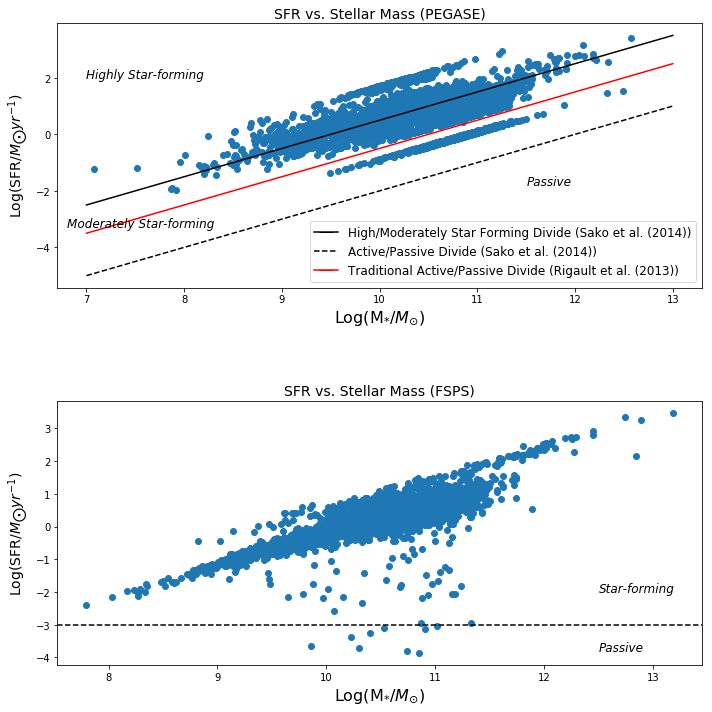

In [3]:
reduced = reduced.astype(float)   #converting all data in reduced data frame to 'float' type

#values for splitting graphs into regions of passive/moderate/high star formation rates   
constant_x = (7, 8, 9, 10, 11, 12, 13) #chosen mass values for x axis
high_y = (-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5) #SFR values for line between high and mod. star formation for given mass values
passive_y = (-5, -4, -3, -2, -1, 0, 1) #SFR values for line between mod. star forming and passive for given mass values

#traditional passive cut-off
trad_y = (-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5) #traditional SFR values between star forming and passive for given mass values

fig = plt.figure(1, figsize=(10,10))

#plotting PEGASE 2 model
plt.subplot2grid((11,1),(0,0), rowspan=5)
plt.plot(reduced.logMass_Mat, reduced.logSFR_Mat, 'o')  #_Mat = PEGASE 2 model 
plt.title('SFR vs. Stellar Mass (PEGASE)', fontsize=14)
plt.xlabel(r'Log(M$_{*}/M_{\odot}$)', fontsize=16)
plt.ylabel(r'Log(SFR/$M_{\bigodot}yr^{-1}$)', fontsize=14)
plt.plot(constant_x, high_y, 'k')
plt.plot(constant_x, passive_y, 'k--')
plt.plot(constant_x, trad_y, 'r')
plt.text(7, 2, 'Highly Star-forming', style='italic', fontsize=12)
plt.text(6.8, -3.3, 'Moderately Star-forming', style='italic', fontsize=12)
plt.text(11.5, -1.8, 'Passive', style='italic', fontsize=12)

#Making a legend
black_line = mlines.Line2D([], [], color='k', marker='_', markersize=14, 
            label='High/Moderately Star Forming Divide (Sako et al. (2014))')
dash_black_line = mlines.Line2D([], [], color='k', linestyle='--', markersize=14, 
            label='Active/Passive Divide (Sako et al. (2014))')
red_line = mlines.Line2D([], [], color='r', marker='_', markersize=14, 
            label='Traditional Active/Passive Divide (Rigault et al. (2013))')
plt.legend(handles=[black_line, dash_black_line, red_line], fontsize=12)


#plotting FSPS model
FSPS = reduced[(reduced.logSFR_Ravi > -4)] 
plt.subplot2grid((11,1),(6,0), rowspan=5)
plt.plot(FSPS.logMass_Ravi, FSPS.logSFR_Ravi, 'o')   #_Ravi = FSPS model
plt.title('SFR vs. Stellar Mass (FSPS)', fontsize=14)
plt.xlabel(r'Log(M$_{*}/M_{\odot}$)', fontsize=16)
plt.ylabel(r'Log(SFR/$M_{\bigodot}yr^{-1}$)', fontsize=14)
plt.axhline(-3 ,color='k', linestyle='--')
plt.text(12.5, -2, 'Star-forming', style='italic', fontsize=12)
plt.text(12.5, -3.8, 'Passive', style='italic', fontsize=12)
plt.tight_layout()

plt.show()
fig.savefig('PEGASE vs. FSPS (logM vs. logSFR).pdf')

plt.close(fig)

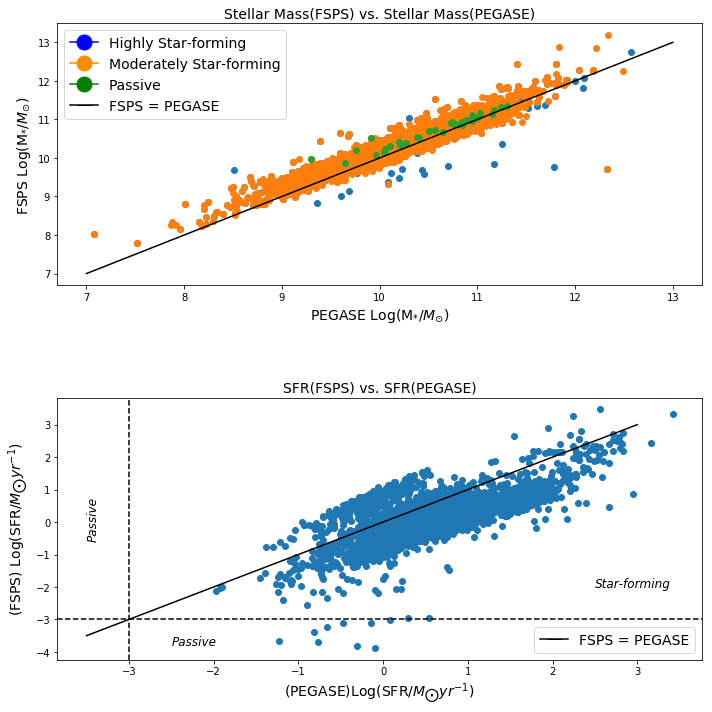

In [5]:
fig = plt.figure(1, figsize=(10,10))
plt.subplot2grid((11,1),(0,0), rowspan=5)

#dividing galaxies into highly star-forming, moderately star-forming or passive
high = reduced[(reduced.logsSFR_Mat >= -9.5) | (reduced.logsSFR_Ravi >= -9.5)]
moderate = reduced[(reduced.logsSFR_Mat > -12) & (reduced.logsSFR_Mat < -9.5) 
            | (reduced.logsSFR_Ravi > -12) & (reduced.logsSFR_Ravi < -9.5) ]
passive = reduced[(reduced.logsSFR_Mat <= -12) | (reduced.logsSFR_Ravi <= -12)]

#comparing mass estimates from both models
plt.plot(high.logMass_Mat, high.logMass_Ravi, 'o')
plt.plot(moderate.logMass_Mat, moderate.logMass_Ravi, 'o')
plt.plot(passive.logMass_Mat, passive.logMass_Ravi, 'o')
plt.title('Stellar Mass(FSPS) vs. Stellar Mass(PEGASE)', fontsize=14)
plt.xlabel('PEGASE Log(M$_{*}/M_{\odot}$)', fontsize=14)
plt.ylabel('FSPS Log(M$_{*}/M_{\odot}$)', fontsize=14)
plt.plot(constant_x, constant_x, 'k')  #plotting where mass from PEGASE 2 = mass from FSPS

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o',markersize=15, label='Highly Star-forming')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o',markersize=15, label='Moderately Star-forming')
green_line = mlines.Line2D([], [], color='g', marker='o',markersize=15, label='Passive')
black_line = mlines.Line2D([], [], color='k', marker='_',markersize=15, label='FSPS = PEGASE')
plt.legend(handles=[blue_line, orange_line, green_line, black_line], fontsize=14)


plt.subplot2grid((11,1),(6,0), rowspan=5)
constantSFR_x = (-3.5, -3, -2, -1, 0, 1, 2, 3) 

#comparing SFR of PEGASE 2 and FSPS models
plt.plot(FSPS.logSFR_Mat, FSPS.logSFR_Ravi, 'o')
plt.title('SFR(FSPS) vs. SFR(PEGASE)' , fontsize=14)
plt.xlabel(r'(PEGASE)Log(SFR/$M_{\bigodot}yr^{-1}$)', fontsize=14)
plt.ylabel(r'(FSPS) Log(SFR/$M_{\bigodot}yr^{-1}$)', fontsize=14)
plt.plot(constantSFR_x, constantSFR_x, 'k')
plt.axhline(-3 ,color='k', linestyle='--')
plt.axvline(-3 ,color='k', linestyle='--')
plt.text(2.5, -2, 'Star-forming', style='italic', fontsize=12)
plt.text(-2.5, -3.8, 'Passive', style='italic', fontsize=12)
plt.text(-3.5, 0.5, 'Passive', style='italic', fontsize=12, rotation=90)
plt.tight_layout()

#legend
black_line = mlines.Line2D([], [], color='k', marker='_',markersize=15, label='FSPS = PEGASE')
plt.legend(handles=[black_line], fontsize=14)
plt.show()
fig.savefig('PEGASE vs. FSPS.pdf')

plt.close(fig)